# 1, Overview

The goal of this project was to design multi-class classifier that builds on binary classifers using least squares regression model. MNIST dataset was used in the project to train and test the classifiers. Two type of multi-class classifers were designed: one-versus-one and one-versus-all. The performance of the two were compared based on confusion matrix and error rate.

In [ ]:
# import python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import loadmat
import math

In [ ]:
X = loadmat("mnist.mat") 
print(X)

data_train = X['trainX'] # Training set digits 
data_label = X['trainY'] # Training set label

data_testX = X['testX'] # Testing set digits
data_testY = X['testY'] # Testing set labels

print(data_train.shape) # There's 60000 images in the training set, each of them is 784-vector.

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
(60000, 784)


# 2, Data Cleaning

Each image(X) has 784 pixels. Some of the pixels are mostly zeros across all samples. As we can see from the below example, the color in the corner are white for most of the images. Thus, only the pixels that are non-zero for at least 600 images are selected for training and testing.

4
5


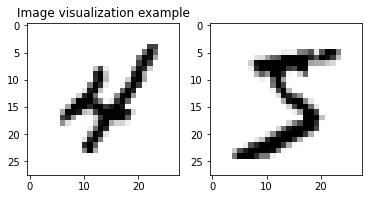

In [ ]:
# Get tenth image and show it
plt.subplot(1,2,1)
plt.imshow(data_train[9,:].reshape(28,28),cmap='binary')
print(data_label[0,9])

plt.title('Image visualization example')

# Get first image and show it
plt.subplot(1,2,2)
plt.imshow(data_train[0,:].reshape(28,28),cmap='binary')
print(data_label[0,0])


In [ ]:
# select only the pixels that are non-zero for at least 600 images.

columns = []
for j in range(len(data_train[0])):
    count = 0
    for i in range(len(data_train)):
        if data_train[i,j] == 0:
            count += 1
            if count > 59400: # delet the pixel if it's zero for more than 59400 images
                columns.append(j)
data_train_clean = np.delete(data_train, columns, axis=1)
data_testX_clean = np.delete(data_testX, columns, axis=1) 

In [ ]:
data_testX_clean.shape 

(10000, 493)

In [ ]:
data_train_clean.shape

(60000, 493)

After cleaning, each image(X) in both test set and training set contains 493 pixels.

# 3, One-versus-all Classifier

## 3.1, Design of binary classifier for each label

Each label y=k is treated as 1, and all y which is not k (y!=k) are treated as -1. As there's 10 type of label(0-9) in MNIST dataset, 10 binary classifiers are designed and used to build the one-versus-all classifier. For each testing X, the one-versus-all classifier is going to return the index of maximum function among the 10 binary classifiers.

Following is the design of zero classifier.

In [ ]:
A = np.c_[np.ones((data_train.shape[0],1)), data_train_clean] # design matrix A = [1 X]

In [ ]:
data_label = data_label.astype(np.int16)
data_0 = data_label.copy()
data_0[data_0 != 0] = -1 # treat y=k as 1
data_0[data_0 == 0] = 1 # treat y!=k as -1

In [ ]:
data_label

array([[5, 0, 4, ..., 5, 6, 8]], dtype=int16)

The following steps solve the equation A<sup>T</sup>·y = A<sup>T</sup>·A·x, where y is the training y and x gives the parameter for the classifer. This parameter gives the minimum distance between predicted y and true y.

In [ ]:
A_In = A.T @ A
A_0 = A.T @ data_0.T
parameters_0 = np.linalg.lstsq(A_In, A_0, rcond=None)[0]    # Solve the matrix equation 

The first element of the parameters is parameter alpha (a scalar), and the rest give parameter beta (a vector). 

In [ ]:
parameters_0

array([[-6.89659482e-01],
       [-7.74225878e-05],
       [-5.10303077e-05],
       [-1.38501611e-04],
       [ 1.87026718e-05],
       [-4.04877796e-04],
       [-1.25418137e-04],
       [-8.65861843e-05],
       [-3.76306953e-04],
       [-3.72113921e-04],
       [-1.33770667e-04],
       [ 2.49282604e-04],
       [-2.41585243e-04],
       [ 1.85734999e-04],
       [-1.95739759e-04],
       [-1.05893342e-04],
       [-8.46323052e-05],
       [-1.53195027e-04],
       [-4.13281322e-04],
       [-1.64556723e-04],
       [-4.22603825e-04],
       [-6.19342280e-04],
       [-2.12729828e-04],
       [-1.24534232e-04],
       [ 1.54845066e-04],
       [-1.77631345e-04],
       [-8.86685439e-05],
       [-1.09696723e-04],
       [ 1.00085237e-05],
       [ 1.19312947e-04],
       [-1.38545337e-04],
       [ 1.52560525e-04],
       [-6.68781723e-05],
       [ 1.13898964e-05],
       [-5.85627517e-06],
       [ 9.28024706e-05],
       [-2.16023594e-05],
       [ 1.12432553e-04],
       [-9.8

In [ ]:
def identify_0(M):
    
    # y_predicted = beta·X+alpha
    
    y_predicted = parameters_0[1:].T @ M.reshape(493,1) + parameters_0[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
identify_0(data_train_clean[1])

0.7648597110373123

The binary classifier gives an output between -1 and 1. If output>0, predicted_y = k. If output<0, predicted_y != k. However, we would not apply the sign function here, as we need the original output as float for comparison in the one-versus-all classifier.

Following are the design of the other 9 binary classifiers. The algorism is the same as zero classifier.

In [ ]:
data_1 = data_label.copy()
data_1[data_1 != 1] = -1
data_1[data_1 == 1] = 1

In [ ]:
A_1 = A.T @ data_1.T
parameters_1 = np.linalg.lstsq(A_In, A_1, rcond=None)[0]   

def identify_1(M):
    y_predicted = parameters_1[1:].T @ M.reshape(493,1) + parameters_1[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_2 = data_label.copy()
data_2[data_2 != 2] = -1
data_2[data_2 == 2] = 1

In [ ]:
A_2 = A.T @ data_2.T
parameters_2 = np.linalg.lstsq(A_In, A_2, rcond=None)[0] 

def identify_2(M):
    y_predicted = parameters_2[1:].T @ M.reshape(493,1) + parameters_2[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_3 = data_label.copy()
data_3[data_3 != 3] = -1
data_3[data_3 == 3] = 1

In [ ]:
A_3 = A.T @ data_3.T
parameters_3 = np.linalg.lstsq(A_In, A_3, rcond=None)[0]  

def identify_3(M):
    y_predicted = parameters_3[1:].T @ M.reshape(493,1) + parameters_3[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_4 = data_label.copy()
data_4[data_4 != 4] = -1
data_4[data_4 == 4] = 1

In [ ]:
A_4 = A.T @ data_4.T
parameters_4 = np.linalg.lstsq(A_In, A_4, rcond=None)[0]  

def identify_4(M):
    y_predicted = parameters_4[1:].T @ M.reshape(493,1) + parameters_4[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_5 = data_label.copy()
data_5[data_5 != 5] = -1
data_5[data_5 == 5] = 1
A_5 = A.T @ data_5.T
parameters_5 = np.linalg.lstsq(A_In, A_5, rcond=None)[0]  

def identify_5(M):
    y_predicted = parameters_5[1:].T @ M.reshape(493,1) + parameters_5[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_6 = data_label.copy()
data_6[data_6 != 6] = -1
data_6[data_6 == 6] = 1
A_6 = A.T @ data_6.T
parameters_6 = np.linalg.lstsq(A_In, A_6, rcond=None)[0]  
def identify_6(M):
    y_predicted = parameters_6[1:].T @ M.reshape(493,1) + parameters_6[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_7 = data_label.copy()
data_7[data_7 != 7] = -1
data_7[data_7 == 7] = 1
A_7 = A.T @ data_7.T
parameters_7 = np.linalg.lstsq(A_In, A_7, rcond=None)[0]  

def identify_7(M):
    y_predicted = parameters_7[1:].T @ M.reshape(493,1) + parameters_7[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_8 = data_label.copy()
data_8[data_8 != 8] = -1
data_8[data_8 == 8] = 1
A_8 = A.T @ data_8.T
parameters_8 = np.linalg.lstsq(A_In, A_8, rcond=None)[0] 

def identify_8(M):
    y_predicted = parameters_8[1:].T @ M.reshape(493,1) + parameters_8[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

In [ ]:
data_9 = data_label.copy()
data_9[data_9 != 9] = -1
data_9[data_9 == 9] = 1
A_9 = A.T @ data_9.T
parameters_9 = np.linalg.lstsq(A_In, A_9, rcond=None)[0]  
def identify_9(M):
    y_predicted = parameters_9[1:].T @ M.reshape(493,1) + parameters_9[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    return y_predicted

## 3.2, Design of the one-versus-all classifier

In [ ]:
def one_vs_all(X):
    
    # get the predicted value from all 10 binary classifiers
    p_9 = identify_9(X)
    p_8 = identify_8(X)
    p_7 = identify_7(X)
    p_6 = identify_6(X)
    p_5 = identify_5(X)
    p_4 = identify_4(X)
    p_3 = identify_3(X)
    p_2 = identify_2(X)
    p_1 = identify_1(X)
    p_0 = identify_0(X)
    
    # get the index of the maximum value
    scores = np.array([p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9])
    return np.argmax(scores)


For each testing X, the one-versus-all classifier is going to return the index of maximum function among the 10 binary classifiers. The returning value is the predicted y.

In [ ]:
def get_predicted(method,X):
    y_predicted = []
    for i in range(len(X)):
        y_predicted.append(method(X[i]))
    return y_predicted

The above function takes a method (one-versus-all or one-versus-one) and an array of X as input, and returns an array of predicted y.

In [ ]:
def get_confusion(method,X,true_Y):
    confusion_M = np.zeros((10,10))
    true_Y = true_Y.reshape(-1)
    y_predicted = get_predicted(method,X)
    errors = 0
    for i in range(len(y_predicted)):
        confusion_M[true_Y[i]][y_predicted[i]]+= 1
        if y_predicted[i]!=true_Y[i]:
            errors += 1
    error_rate = errors/len(y_predicted)
    return confusion_M.astype(int), error_rate
    

The above function takes a method (one-versus-all or one-versus-one), an array of testX, and an array of testY as input, and returns an confusion matrix and error rate.

## 3.3 Evaluation

### 3.3.1 Evaluation on training set

In [ ]:
confusion_M_1_train, error_rate_1_train = get_confusion(one_vs_all, data_train_clean, data_label)

In [ ]:
confusion_M_1_train # confusion_M[i,j] represents that i is classified as j

array([[5669,    8,   21,   19,   25,   46,   65,    4,   60,    6],
       [   2, 6543,   36,   17,   20,   30,   14,   14,   60,    6],
       [  99,  278, 4757,  153,  116,   17,  234,   92,  190,   22],
       [  38,  172,  174, 5150,   31,  122,   59,  122,  135,  128],
       [  13,  104,   41,    5, 5189,   52,   45,   24,   60,  309],
       [ 164,   94,   30,  448,  103, 3974,  185,   44,  237,  142],
       [ 104,   78,   77,    2,   64,  106, 5448,    0,   36,    3],
       [  55,  191,   36,   48,  165,    9,    4, 5443,   13,  301],
       [  69,  492,   64,  225,  102,  220,   64,   21, 4417,  177],
       [  67,   66,   26,  115,  365,   12,    4,  513,   39, 4742]])

In [ ]:
error_rate_1_train

0.14446666666666666

The error rate for training set is 14.44% > 10%, which is relatively high. Thus, the connection between data and label is probably not very high based on this classifier. 

The confusion matrix shows significanly larger value in diagonal than in elsewhere, which indicates most values are classified correctly. However, there're still a significant amount of images get misclassified. For example, 278 images that are digit 1 get classifed as digit 2.

Based on error rate and confusion matrix, the training error of the one-versus-all classifier is relatively high.

### 3.3.2 Evaluation on testing set

In [ ]:
confusion_M_1_test, error_rate_1_test = get_confusion(one_vs_all, data_testX_clean, data_testY)

In [ ]:
confusion_M_1_test

array([[ 944,    0,    1,    2,    2,    8,   13,    2,    7,    1],
       [   0, 1107,    2,    2,    3,    1,    5,    1,   14,    0],
       [  18,   54,  815,   26,   16,    0,   38,   22,   39,    4],
       [   4,   18,   22,  884,    5,   16,   10,   22,   20,    9],
       [   0,   22,    6,    0,  883,    3,    9,    1,   12,   46],
       [  24,   19,    3,   74,   24,  656,   24,   13,   38,   17],
       [  17,    9,   10,    0,   22,   17,  876,    0,    7,    0],
       [   5,   43,   14,    6,   25,    1,    1,  883,    1,   49],
       [  14,   48,   11,   31,   26,   40,   17,   13,  756,   18],
       [  16,   10,    3,   17,   80,    0,    1,   75,    4,  803]])

In [ ]:
print(confusion_M_1_test.sum(axis=1)) # number of digits that are i
print(confusion_M_1_test.sum(axis=0)) #  number of digits classified as i

[ 980 1135 1032 1010  982  892  958 1028  974 1009]
[1042 1330  887 1042 1086  742  994 1032  898  947]


In [ ]:
error_rate_1_test

0.1393

The error rate for training set is 13.93% > 10%, which is relatively high. Thus, the prediction on testing set is not very accurate.

The confusion matrix shows significanly larger value in diagonal than in elsewhere, which indicates most values are classified correctly. However, as the same as the training set, there're still a significant amount of images get misclassified. Digits 1 and 0 are easy to classify, while digits 4,5,7,8,9 are harder. Digits 4 and 9, 5 and 8, 6 and 8, 7 and 9 are easy to get confused, so they are harder to classifed.

Based on error rate and confusion matrix, the prediction of the one-versus-all classifier is not very accurate.

# 4, One-versus-one Classifier

## 4.1, Design of pairwise classifiers

A boolean classifer is designed for each pair i,j. Each y=i is treated as -1, and each y=j is treated as 1. For each i-versus-j classifier, if y_predicted = -1, it will "vote" for class i, and if y_predicted = 1, it will vote for class j. As total label(class) is 10, we need 10(10-1)/2=45 pairwise classifiers. The one-versus-one classifier is going increment the "vote" for each label and return the class that achieve maximum votes.

In [ ]:
data_label_trans = data_label.copy()
data_label_trans[data_label_trans==1] = 11 

# when change label to -1 and 1, the original 1 is mixed with transformed 1. 
# So we use 11 to represent 1 in the following model to avoid confusion.

In [ ]:
def get_class(int_1,int_2):
    label = data_label_trans.copy()
    
    # transform the label=i to -1 and label=j to 1, leaving others unchanged.
    label[label == int_1] = -1
    label[label == int_2] = 1
    label = label.reshape(-1)
    
    # select label with i,j as a subset
    occurrance = list(np.where((label == 1) | (label == -1)))
    data = data_train_clean[occurrance[0], :]
    sub_label = label[occurrance[0]]
    sub_label = sub_label.reshape(-1)
    return data, sub_label # get subsets of both trainX and trainY

The above function takes two interger, int_1(i) and int_2(j), and returns the subset of the training set that only contains data labeled as i and j.

In [ ]:
def get_para(int_1,int_2):
    trainX, trainY = get_class(int_1,int_2)
    trainX = np.vstack(trainX)
    trainY = np.vstack(trainY)
    
    # using least square model to find the parameter.
    # The model algorism is the same as decribed in one-versus-all.
    A = np.c_[np.ones((trainX.shape[0],1)), trainX]
    A_In = A.T @ A
    A_y = A.T @ trainY
    parameters = np.linalg.lstsq(A_In, A_y, rcond=None)[0]
    return parameters

The above function takes two interger, int_1(i) and int_2(j), and returns the parameter of i-versus-j classifier.

In [ ]:
# get parameter for each pairwise classifier

para_01 = get_para(0,11)
para_02 = get_para(0,2)
para_03 = get_para(0,3)
para_04 = get_para(0,4)
para_05 = get_para(0,5)
para_06 = get_para(0,6)
para_07 = get_para(0,7)
para_08 = get_para(0,8)
para_09 = get_para(0,9)
para_12 = get_para(11,2)
para_13 = get_para(11,3)
para_14 = get_para(11,4)
para_15 = get_para(11,5)
para_16 = get_para(11,6)
para_17 = get_para(11,7)
para_18 = get_para(11,8)
para_19 = get_para(11,9)
para_23 = get_para(2,3)
para_24 = get_para(2,4)
para_25 = get_para(2,5)
para_26 = get_para(2,6)
para_27 = get_para(2,7)
para_28 = get_para(2,8)
para_29 = get_para(2,9)
para_34 = get_para(3,4)
para_35 = get_para(3,5)
para_36 = get_para(3,6)
para_37 = get_para(3,7)
para_38 = get_para(3,8)
para_39 = get_para(3,9)
para_45 = get_para(4,5)
para_46 = get_para(4,6)
para_47 = get_para(4,7)
para_48 = get_para(4,8)
para_49 = get_para(4,9)
para_56 = get_para(5,6)
para_57 = get_para(5,7)
para_58 = get_para(5,8)
para_59 = get_para(5,9)
para_67 = get_para(6,7)
para_68 = get_para(6,8)
para_69 = get_para(6,9)
para_78 = get_para(7,8)
para_79 = get_para(7,9)
para_89 = get_para(8,9)

In [ ]:
para_01

array([[-4.23144029e-01],
       [-2.12668230e-03],
       [ 4.48113475e-03],
       [-2.72560748e-03],
       [ 2.59689741e-03],
       [-6.54671291e-04],
       [ 2.56524974e-03],
       [ 1.52770358e-02],
       [-5.36271629e-03],
       [-1.89064534e-04],
       [-2.82415605e-04],
       [ 9.14998791e-05],
       [-2.24647755e-04],
       [ 2.80637029e-04],
       [-3.29495492e-04],
       [ 2.20084079e-04],
       [-5.43810346e-05],
       [ 5.04155372e-05],
       [-9.27622818e-05],
       [-4.87080462e-05],
       [-1.21454528e-05],
       [-8.85184556e-05],
       [ 1.34818609e-03],
       [-4.28759361e-04],
       [-1.33983458e-04],
       [ 1.52177098e-04],
       [-3.25118880e-04],
       [ 5.85824530e-05],
       [-3.61585117e-06],
       [-3.45090347e-05],
       [-4.60531357e-05],
       [-4.41380344e-05],
       [-5.99669702e-05],
       [-1.77468551e-05],
       [ 2.26368991e-05],
       [-9.99153692e-05],
       [-5.78494484e-06],
       [-1.27674097e-04],
       [-6.6

In [ ]:
def pair_classi(M,para,int_1,int_2):
    y_predicted = para[1:].T @ M.reshape(-1) + para[0][0].T
    y_predicted = y_predicted.reshape(-1)[0]
    if y_predicted > 0:
        identify_num = int_2
    else:
        identify_num = int_1
    return identify_num

The above function takes in X, i and j, and returns the predicted label (y) under i-versus-j classifier.

Following is example of the classification of the first digit under 5-versus-9 classifier. 

In [ ]:
pair_classi(data_train_clean[0],para_59,5,9)

5

## 4.2 Design of one-versus-one classifier

The one-versus-one classifier is going increment the "vote" for each label and return the class that achieve maximum votes.

In [ ]:
def one_vs_one(X):
    
    # get vote from all 45 pairwise classifier.
    p_01 = pair_classi(X,para_01,0,11) # 1 is represented by 11
    p_02 = pair_classi(X,para_02,0,2)
    p_03 = pair_classi(X,para_03,0,3)
    p_04 = pair_classi(X,para_04,0,4)
    p_05 = pair_classi(X,para_05,0,5)
    p_06 = pair_classi(X,para_06,0,6)
    p_07 = pair_classi(X,para_07,0,7)
    p_08 = pair_classi(X,para_08,0,8)
    p_09 = pair_classi(X,para_09,0,9)
    p_12 = pair_classi(X,para_12,11,2) 
    p_13 = pair_classi(X,para_13,11,3)
    p_14 = pair_classi(X,para_14,11,4)
    p_15 = pair_classi(X,para_15,11,5)
    p_16 = pair_classi(X,para_16,11,6)
    p_17 = pair_classi(X,para_17,11,7)
    p_18 = pair_classi(X,para_18,11,8)
    p_19 = pair_classi(X,para_19,11,9)
    p_23 = pair_classi(X,para_23,2,3)
    p_24 = pair_classi(X,para_24,2,4)
    p_25 = pair_classi(X,para_25,2,5)
    p_26 = pair_classi(X,para_26,2,6)
    p_27 = pair_classi(X,para_27,2,7)
    p_28 = pair_classi(X,para_28,2,8)
    p_29 = pair_classi(X,para_29,2,9)
    p_34 = pair_classi(X,para_34,3,4)
    p_35 = pair_classi(X,para_35,3,5)
    p_36 = pair_classi(X,para_36,3,6)
    p_37 = pair_classi(X,para_37,3,7)
    p_38 = pair_classi(X,para_38,3,8)
    p_39 = pair_classi(X,para_39,3,9)
    p_45 = pair_classi(X,para_45,4,5)
    p_46 = pair_classi(X,para_46,4,6)
    p_47 = pair_classi(X,para_47,4,7)
    p_48 = pair_classi(X,para_48,4,8)
    p_49 = pair_classi(X,para_49,4,9)
    p_56 = pair_classi(X,para_56,5,6)
    p_57 = pair_classi(X,para_57,5,7)
    p_58 = pair_classi(X,para_58,5,8)
    p_59 = pair_classi(X,para_59,5,9)
    p_67 = pair_classi(X,para_67,6,7)
    p_68 = pair_classi(X,para_68,6,8)
    p_69 = pair_classi(X,para_69,6,9)
    p_78 = pair_classi(X,para_78,7,8)
    p_79 = pair_classi(X,para_79,7,9)
    p_89 = pair_classi(X,para_89,8,9)
    
    votes = np.array([p_01,p_02,p_03,p_04,p_05,p_06,p_07,p_08,p_09,p_12,p_13,p_14,p_15,p_16,p_17,p_18,p_19,p_23,p_24,p_25,p_26,p_27,p_28,p_29,p_34,p_35,p_36,p_37,p_38,p_39,p_45,p_46,p_47,p_48,p_49,p_56,p_57,p_58,p_59,p_67,p_68,p_69,p_78,p_79,p_89])
   
    # get an array that counts vote for each label   
    (num, counts) = np.unique(votes, return_counts=True)
    
    # transform the result into an array
    # eg. [1 4] represents label1 get 4 votes.    
    frequencies = np.asarray((num, counts)).T
    
    # get the label having the maximum vote 
    max_count = 0
    for i in range(len(frequencies)):
        if frequencies[i,1]>max_count:
            max_count = frequencies[i,1]
            major_vote = frequencies[i,0]
    if major_vote == 11: # transform 11 back to 1.
        major_vote = 1
    return major_vote

In [ ]:
one_vs_one(data_train_clean[0]) # example of classification for the first digit

5

## 4.3 Evaluation

### 4.3.1 Evaluation on training set

In [ ]:
confusion_M_2_train, error_rate_2_train = get_confusion(one_vs_one, data_train_clean, data_label)

In [ ]:
confusion_M_2_train

array([[5799,    0,   18,    8,   15,   21,   23,    6,   32,    1],
       [   2, 6599,   42,   22,    6,   21,    3,   12,   27,    8],
       [  50,   57, 5508,   51,   67,   29,   44,   48,   87,   17],
       [  33,   22,  127, 5558,    7,  177,   22,   51,   93,   41],
       [  14,   12,   15,    3, 5577,   10,   16,   19,    7,  169],
       [  45,   29,   41,  143,   26, 4971,   94,    8,   47,   17],
       [  26,   12,   45,    2,   36,   86, 5682,    0,   28,    1],
       [   9,   56,   61,    5,   82,   12,    1, 5875,    8,  156],
       [  32,  146,   52,  124,   43,  148,   41,   30, 5168,   67],
       [  22,    9,   21,   80,  164,   36,    2,  155,   33, 5427]])

In [ ]:
error_rate_2_train

0.06393333333333333

The error rate for training set is 6.39% < 10%, which is relatively low. Thus, the connection between data and label is probably relatively high based on this classifier.

The confusion matrix shows significanly larger value in diagonal than in elsewhere, which indicates most values are classified correctly. However, there're still some small amount of images get misclassified. For example, 57 images that are digit 1 get classifed as digit 2 (smaller than 278 from one-vs-all).

Based on error rate and confusion matrix, the training error of the one-versus-all classifier is relatively low.

### 4.3.2 Evaluation on testing set

In [ ]:
confusion_M_2_test, error_rate_2_test = get_confusion(one_vs_one, data_testX_clean, data_testY)

In [ ]:
confusion_M_2_test

array([[ 962,    0,    3,    1,    1,    4,    5,    3,    1,    0],
       [   0, 1120,    3,    3,    1,    2,    3,    1,    2,    0],
       [   8,   16,  935,   14,   13,    5,   11,    7,   23,    0],
       [   8,    0,   16,  926,    3,   20,    3,   10,   19,    5],
       [   2,    2,    7,    1,  933,    2,    6,    3,    2,   24],
       [  12,    5,    2,   30,    9,  800,   15,    2,   13,    4],
       [   8,    3,   12,    0,    8,   20,  905,    0,    2,    0],
       [   1,   13,   18,    4,   10,    1,    0,  956,    3,   22],
       [   8,   10,   11,   21,   11,   34,   12,   10,  844,   13],
       [   6,    4,    1,   10,   31,   11,    0,   24,    5,  917]])

In [ ]:
print(confusion_M_2_test.sum(axis=1)) # number of digits that are i
print(confusion_M_2_test.sum(axis=0)) #  number of digits classified as i

[ 980 1135 1032 1010  982  892  958 1028  974 1009]
[1015 1173 1008 1010 1020  899  960 1016  914  985]


In [ ]:
error_rate_2_test

0.0702

The error rate for training set is 7.02% > 10%, which is relatively low. Thus, the prediction on testing set is very accurate.

The confusion matrix shows significanly larger value in diagonal than in elsewhere, which indicates most values are classified correctly. However, as the same as the training set, there're a small amount of images get misclassified. Digits 1 and 0 are easy to classify, while digits 4,5,7,8,9 are harder. Digits 4 and 9, 5 and 8, 6 and 8, 7 and 9 are easy to get confused, so they are harder to classifed. The one-versus-all classifier, shown in Session 3, shows similar trend of error in prediction.

Based on error rate and confusion matrix, the prediction of the one-versus-all classifier is relatively accurate.

# 4, Discussion

The one-versus-one classifier have a smaller error rate than one-versus-all classifier in traing set. Its confusion matrix of training set also has higher values in diagonal. So one-versus-one classifier has smaller training error than one-versus-all classifier.

The one-versus-one classifier also have a smaller error rate than one-versus-all classifier in testing set. Its confusion matrix of testing set also has higher values in diagonal. So one-versus-one classifier gives more accurate prediction than one-versus-all classifier.

The two classifier have the same trend regarding misclassification. As shown in confusion matrix, for both classifier, the digits that are hardest to identify are digits 4 and 9, 5 and 8, 6 and 8, 7 and 9.